# LSTM for Bonn University Epilepsy Dataset

A | B | C | D | E
--- | --- | --- | --- | ---
*Non-Epileptic* | *Non-Epileptic* | `Epileptic` | `Epileptic` | `Epileptic`
Eyes Opened | Eyes Closed | Interictal | Interictal | Ictal

In [3]:
# Will enable Google Colab specific code. If you run locally, put it to False.
GColab = True

if GColab:
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip  # Set A
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip  # Set B
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip  # Set C
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip  # Set D
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip  # Set E

  !unzip Z.zip -d 'Set A'
  !unzip O.zip -d 'Set B'
  !unzip N.zip -d 'Set C'
  !unzip F.zip -d 'Set D'
  !unzip S.zip -d 'Set E'

--2018-07-14 10:23:34--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 578047 (564K) [application/zip]
Saving to: ‘Z.zip’

Z.zip               100%[===================>] 564.50K   488KB/s    in 1.2s    

2018-07-14 10:23:35 (488 KB/s) - ‘Z.zip’ saved [578047/578047]

--2018-07-14 10:23:36--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625970 (611K) [application/zip]
Saving to: ‘O.zip’

O.zip               100%[===================>] 611.30K   528KB/s    in 1.2s    

2018-07-14 10:23:38 (528 KB/s) - ‘O.zip’ saved [62

Archive:  F.zip
  inflating: Set D/F100.txt          
  inflating: Set D/F002.txt          
  inflating: Set D/F003.txt          
  inflating: Set D/F004.txt          
  inflating: Set D/F005.txt          
  inflating: Set D/F006.txt          
  inflating: Set D/F007.txt          
  inflating: Set D/F008.txt          
  inflating: Set D/F009.txt          
  inflating: Set D/F010.txt          
  inflating: Set D/F011.txt          
  inflating: Set D/F012.txt          
  inflating: Set D/F013.txt          
  inflating: Set D/F014.txt          
  inflating: Set D/F015.txt          
  inflating: Set D/F016.txt          
  inflating: Set D/F017.txt          
  inflating: Set D/F018.txt          
  inflating: Set D/F019.txt          
  inflating: Set D/F020.txt          
  inflating: Set D/F021.txt          
  inflating: Set D/F022.txt          
  inflating: Set D/F023.txt          
  inflating: Set D/F024.txt          
  inflating: Set D/F025.txt          
  inflating: Set D/F026.txt       

In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
if GColab:
  !pip install tqdm
  
import os
from tqdm import tqdm

if GColab:
  DATA_DIR_A = './Set A/'
  DATA_DIR_B = './Set B/'
  DATA_DIR_C = './Set C/'
  DATA_DIR_D = './Set D/'
  DATA_DIR_E = './Set E/'
else:
  DATA_DIR_A = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set A/'
  DATA_DIR_B = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set B/'
  DATA_DIR_C = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set C/'
  DATA_DIR_D = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set D/'
  DATA_DIR_E = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set E/'
  
def load_data():
    data = []
    nbFiles = 0
    for fname in tqdm(os.listdir(DATA_DIR_A)):
        label = 0
        img = np.loadtxt(DATA_DIR_A + fname)
        data.append([img, np.array(label)])
        nbFiles+=1

    #for fname in tqdm(os.listdir(DATA_DIR_B)):
    #    label = 0
    #    img = np.loadtxt(DATA_DIR_B + fname)
    #    data.append([img, np.array(label)])
    #    nbFiles+=1    
    
    #for fname in tqdm(os.listdir(DATA_DIR_C)):
    #    label = 1
    #    img = np.loadtxt(DATA_DIR_C + fname)
    #    data.append([np.array(img), np.array(label)])
    #    nbFiles+=1

    #for fname in tqdm(os.listdir(DATA_DIR_D)):
    #    label = 1
    #    img = np.loadtxt(DATA_DIR_D + fname)
    #    data.append([np.array(img), np.array(label)])
    #    nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_E)):
        label = 1
        img = np.loadtxt(DATA_DIR_E + fname)
        data.append([np.array(img), np.array(label)])
        nbFiles+=1
        
    return data


data = load_data()
print(len(data))

100%|██████████| 100/100 [00:01<00:00, 61.09it/s]

200


In [0]:
from sklearn.utils import shuffle
data = shuffle(data)

nb_train = round(len(data) * 0.8)
data_train = data[0:nb_train]
data_test = data[nb_train:]

X_train = np.array([d[0] for d in data_train])
Y_train = np.array([d[1] for d in data_train])

X_test = np.array([d[0] for d in data_test])
Y_test = np.array([d[1] for d in data_test])

X_train.shape
    
X_train = X_train.reshape(X_train.shape[0], 4097, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

X_test = X_test.reshape(X_test.shape[0], 4097, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

#num_steps = 30
batch_size = 4
nb_epoch = 20
hidden_size = 64
use_dropout=True

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(4097,1)))
#model.add(LSTM(64, return_sequences=False))

if use_dropout:
  model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(model.summary())

history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, nb_epoch=nb_epoch)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

#checkpointer = ModelCheckpoint(filepath=data_path + '/model-{epoch:02d}.hdf5', verbose=1)


# 1 LSTM with 64 (4097,1)
# Adam, Binary_CrossEntropy, Batch Size 4, Epoch 20
# --> 99 - 100% Accuracy (A <-> E)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 128 samples, validate on 32 samples
Epoch 1/20
128/128 [==============================] - 65s 507ms/step - loss: 0.6373 - mean_absolute_error: 0.4528 - acc: 0.6797 - val_loss: 0.5149 - val_mean_absolute_error: 0.3940 - val_acc: 0.8750
Epoch 2/20
128/128 [==============================] - 64s 503ms/step - loss: 0.4629 - mean_absolute_error: 0.3534 - acc: 0.8203 - val_loss: 0.4130 - val_mean_absolute_error: 0.3228 - val_acc: 0.9062
Epoch 3/20
128/128 [==============================] - 67s 520ms/step - loss: 0.3667 - mean_absolute_error: 0.2862 - acc: 0.8828 - val_loss: 0.3464 - val_mean_absolute_error: 0.2658 - val_acc: 0.9062
Epoch 4/20
128/128 [==============================] - 74s 576ms/step - loss: 0.2862 - mean_absolute_error: 0.2195 - acc: 0.9375 - val_loss: 0.2732 - val_mean_absolute_error: 0.2139 - val_acc: 0.9062
Epoch 5/20
128/128 [==============================] - 74s 580ms/step - loss: 0.2180 - mean_absolute_error: 0.1764 - acc: 0.9688 - val_loss: 0.2202 - val_mean_a

128/128 [==============================] - 70s 550ms/step - loss: 0.1828 - mean_absolute_error: 0.1490 - acc: 0.9688 - val_loss: 0.1578 - val_mean_absolute_error: 0.1290 - val_acc: 0.9688
Epoch 7/20
128/128 [==============================] - 64s 503ms/step - loss: 0.1201 - mean_absolute_error: 0.0970 - acc: 0.9922 - val_loss: 0.0788 - val_mean_absolute_error: 0.0733 - val_acc: 1.0000
Epoch 8/20
128/128 [==============================] - 64s 500ms/step - loss: 0.0825 - mean_absolute_error: 0.0724 - acc: 0.9922 - val_loss: 0.0644 - val_mean_absolute_error: 0.0606 - val_acc: 1.0000
Epoch 9/20
128/128 [==============================] - 63s 494ms/step - loss: 0.0644 - mean_absolute_error: 0.0583 - acc: 0.9922 - val_loss: 0.0483 - val_mean_absolute_error: 0.0462 - val_acc: 1.0000
Epoch 10/20
128/128 [==============================] - 64s 497ms/step - loss: 0.0746 - mean_absolute_error: 0.0536 - acc: 0.9844 - val_loss: 0.0376 - val_mean_absolute_error: 0.0364 - val_acc: 1.0000
Epoch 11/20
 56

128/128 [==============================] - 64s 499ms/step - loss: 0.0445 - mean_absolute_error: 0.0412 - acc: 1.0000 - val_loss: 0.0317 - val_mean_absolute_error: 0.0307 - val_acc: 1.0000
Epoch 12/20
128/128 [==============================] - 65s 506ms/step - loss: 0.0528 - mean_absolute_error: 0.0383 - acc: 0.9922 - val_loss: 0.0256 - val_mean_absolute_error: 0.0250 - val_acc: 1.0000
Epoch 13/20
128/128 [==============================] - 64s 501ms/step - loss: 0.0319 - mean_absolute_error: 0.0305 - acc: 1.0000 - val_loss: 0.0267 - val_mean_absolute_error: 0.0258 - val_acc: 1.0000
Epoch 14/20
128/128 [==============================] - 65s 506ms/step - loss: 0.0257 - mean_absolute_error: 0.0233 - acc: 0.9922 - val_loss: 0.0182 - val_mean_absolute_error: 0.0178 - val_acc: 1.0000
Epoch 15/20
128/128 [==============================] - 65s 505ms/step - loss: 0.0255 - mean_absolute_error: 0.0243 - acc: 1.0000 - val_loss: 0.0134 - val_mean_absolute_error: 0.0132 - val_acc: 1.0000
Epoch 16/20


128/128 [==============================] - 65s 504ms/step - loss: 0.0192 - mean_absolute_error: 0.0185 - acc: 1.0000 - val_loss: 0.0116 - val_mean_absolute_error: 0.0115 - val_acc: 1.0000
Epoch 17/20
128/128 [==============================] - 63s 495ms/step - loss: 0.0170 - mean_absolute_error: 0.0160 - acc: 1.0000 - val_loss: 0.0104 - val_mean_absolute_error: 0.0103 - val_acc: 1.0000
Epoch 18/20
128/128 [==============================] - 63s 496ms/step - loss: 0.0136 - mean_absolute_error: 0.0133 - acc: 1.0000 - val_loss: 0.1319 - val_mean_absolute_error: 0.0390 - val_acc: 0.9688
Epoch 19/20
128/128 [==============================] - 63s 495ms/step - loss: 0.0514 - mean_absolute_error: 0.0257 - acc: 0.9922 - val_loss: 0.0330 - val_mean_absolute_error: 0.0314 - val_acc: 1.0000
Epoch 20/20
40/40 [==============================] - 3s 66ms/step


dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


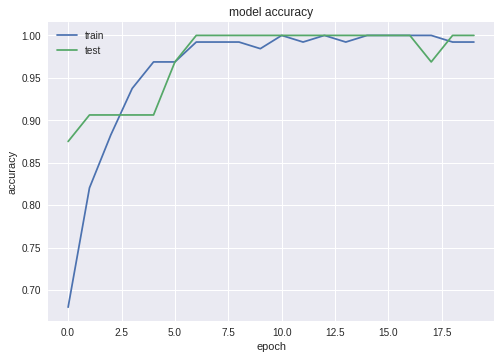

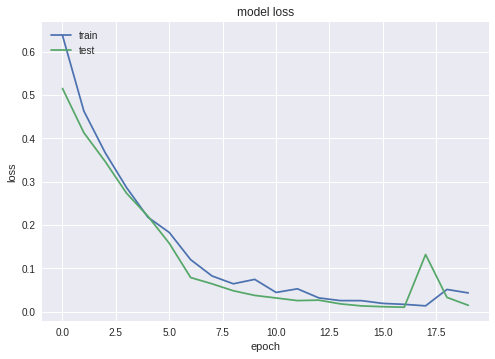

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()